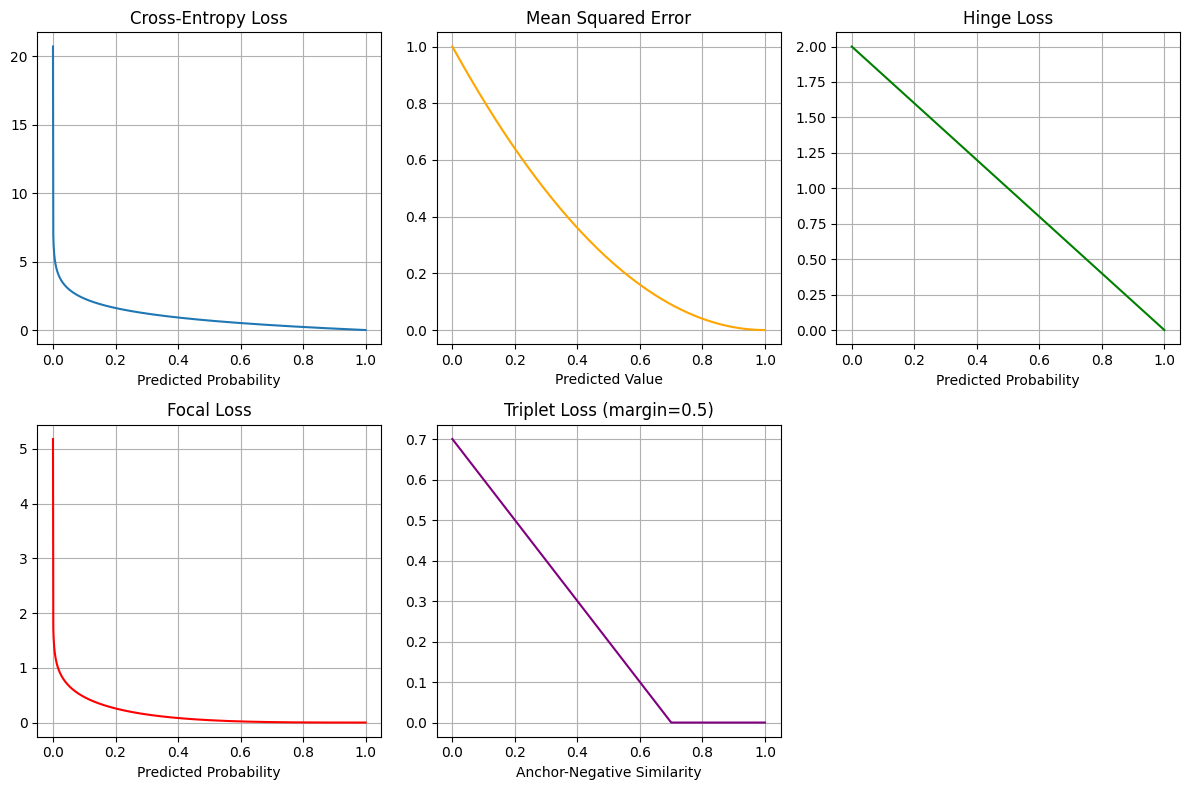

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Small epsilon (1e-9) added to prevent log(0)
# Setup predictions and ground truth
y_true_binary = 1
y_pred = np.linspace(0, 1, 1000)

# Binary Cross-Entropy
bce = - (y_true_binary * np.log(y_pred + 1e-9) + (1 - y_true_binary) * np.log(1 - y_pred + 1e-9))

# Mean Squared Error (MSE)
mse = (y_pred - y_true_binary) ** 2

# Hinge Loss (assuming label y_true = +1)
y_true_hinge = 1  # For hinge, labels are typically -1 or +1
hinge = np.maximum(0, 1 - y_true_hinge * (2 * y_pred - 1))  # Map [0,1] -> [-1,1] for prediction

# Focal Loss (binary case, gamma=2)
gamma = 2.0
alpha = 0.25 
focal = -(
    alpha * y_true_binary * (1 - y_pred) ** gamma * np.log(y_pred + 1e-9) +
    (1 - alpha) * (1 - y_true_binary) * y_pred ** gamma * np.log(1 - y_pred + 1e-9)
)

# Triplet Loss - simulate with a fixed anchor-positive distance and varying anchor-negative similarity
# Here, we'll use a margin-based loss with a fixed positive distance
margin = 0.5
positive_dist = 0.2
negative_sim = np.linspace(0, 1, 1000)  # simulate cosine similarity between anchor and negative
triplet_loss = np.maximum(0, positive_dist - negative_sim + margin)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(y_pred, bce, label='Cross-Entropy')
plt.title("Cross-Entropy Loss")
plt.xlabel("Predicted Probability")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(y_pred, mse, label='MSE', color='orange')
plt.title("Mean Squared Error")
plt.xlabel("Predicted Value")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(y_pred, hinge, label='Hinge Loss', color='green')
plt.title("Hinge Loss")
plt.xlabel("Predicted Probability")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(y_pred, focal, label='Focal Loss (γ=2)', color='red')
plt.title("Focal Loss")
plt.xlabel("Predicted Probability")
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(negative_sim, triplet_loss, label='Triplet Loss', color='purple')
plt.title("Triplet Loss (margin=0.5)")
plt.xlabel("Anchor-Negative Similarity")
plt.grid(True)

plt.tight_layout()
plt.show()